# 检测和分析人脸

计算机视觉解决方案通常需要人工智能 （AI） 解决方案才能检测、分析或识别人脸。或者例如，假设零售公司 Northwind Traders 已决定实施"智能商店"，其中 AI 服务监控商店以识别需要帮助的客户，并指示员工帮助他们。实现此目的的一个方法就是执行面部检测和分析 - 换句话说，确定图像中是否有任何人脸，如果是，则分析其特征。

![A robot analyzing a face](./images/face_analysis.jpg)

## 使用人脸认知服务检测人脸

假设 Northwind 贸易商希望创建智能商店系统，该系统需要能够检测客户并分析他们的面部特征。在 Microsoft Azure 中，可以使用 **Face**，这是 Azure 认知服务的一部分。


### 创建认知服务资源

让我们从在 Azure 订阅中创建 **认知服务** 资源开始。

>**注意**：如果您已经有一个认知服务资源，只需在 Azure 门户中打开其 **快速启动**页面，然后将其键和终结点复制到下面的单元格。否则，请按照以下步骤创建一个。


1. 在另一个浏览器选项卡中，以 https://portal.azure.com 打开 Azure 门户，然后使用 Microsoft 帐户登录。
2. 单击 **&#65291;创建资源**按钮，搜索 *认知服务*，并创建具有以下设置的 **认知服务**资源：
    - **名称**： *输入唯一名称*。
    - **订阅**： *您的 Azure 订阅*。
    - **位置**： *选择任何可用的区域*：
    - **定价层**： S0
    - **资源组**： *创建具有唯一名称的资源组*。
3. 等待部署完成。然后转到您的认知服务资源，在 **概述**页面上，单击链接以管理服务的键。您需要端点和键才能从客户端应用程序连接到认知服务资源。


###获取认知服务资源的关键和端点

要使用认知服务资源，客户端应用程序需要其端点和身份验证密钥：

1. 在 Azure 门户中，在认知服务资源的 **Keys 和端点** 页面上，复制资源中的 **Key1** 并将其粘贴到下面的代码中，替换 **YOUR_COG_KEY**** 。
2. 复制资源中的 **终结点**并将其粘贴到下面的代码中，替换 **YOUR_COG_ENDPOINT**** 。
3. 单击"运行单元格"<span>&#9655</span>按钮（在单元格左上角）运行单元格中的代码。

In [13]:
cog_key = 'ee7d38218eae4f9e9c2bceaa60f13d75'
cog_endpoint = 'https://test233.cognitiveservices.azure.cn/'

print('终结点为：{} \n密钥为： {}'.format(cog_endpoint, cog_key))

终结点为：https://test233.cognitiveservices.azure.cn/ 
密钥为： ee7d38218eae4f9e9c2bceaa60f13d75


<p hidden>
cog_key = 'ee7d38218eae4f9e9c2bceaa60f13d75'
cog_endpoint = 'https://test233.cognitiveservices.azure.cn/'    
<p>

若要在认知服务资源中使用人脸服务，需要安装 Azure 认知服务包。

In [2]:
! pip install azure-cognitiveservices-vision-face

现在，您已经安装了认知服务资源和 SDK 包，您可以使用 Face 服务来检测存储中的人脸。

运行下面的代码单元格以查看示例。

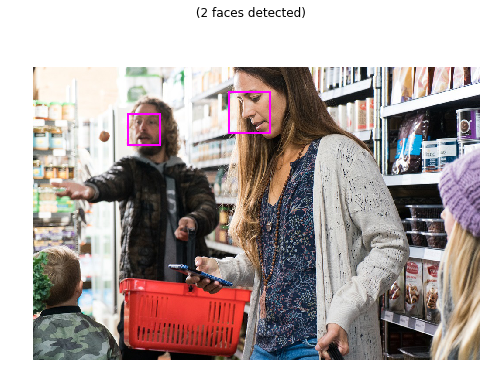

In [3]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from python_code import faces
import os
%matplotlib inline

# 创建人脸检测客户端
face_client = FaceClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# 打开图像
image_path = os.path.join('data', 'face', 'store_cam2.jpg')
image_stream = open(image_path, "rb")

# 检测人脸
detected_faces = face_client.face.detect_with_stream(image=image_stream)

# 展示检测框
faces.show_faces(image_path, detected_faces)

每个检测到的人脸都分配了一个唯一的 ID，因此您的应用程序可以识别检测到的每个面。

运行下面的单元格以查看更多购物者面孔的 ID。

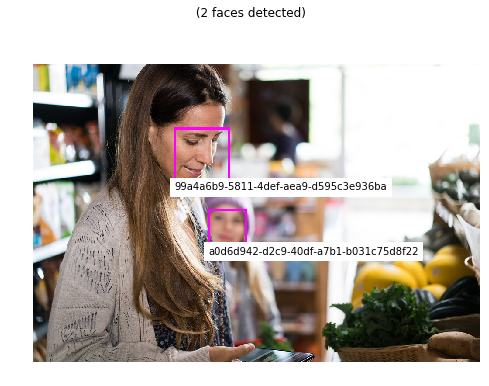

In [4]:
# 打开图像
image_path = os.path.join('data', 'face', 'store_cam3.jpg')
image_stream = open(image_path, "rb")

# 检测人脸
detected_faces = face_client.face.detect_with_stream(image=image_stream)

# 展示人脸
faces.show_faces(image_path, detected_faces, show_id=True)

## 分析面部属性

人脸不仅仅是检测人脸。它还可以分析面部特征和表情，以表明年龄和情绪状态;例如，运行下面的代码来分析购物者的面部属性。

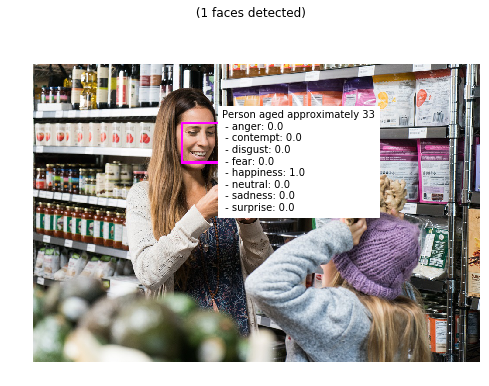

In [5]:
# 打开图像
image_path = os.path.join('data', 'face', 'store_cam1.jpg')
image_stream = open(image_path, "rb")

# 检测人脸和指定的面部属性
attributes = ['age', 'emotion']
detected_faces = face_client.face.detect_with_stream(image=image_stream, return_face_attributes=attributes)

# 展示脸和面部属性
faces.show_face_attributes(image_path, detected_faces)

根据图像中为顾客检测到的情绪评分，客户似乎对购物体验很满意。

## 查找相似的脸

为每个检测到的面创建的人脸 ID 用于单独识别人脸检测。您可以使用这些 ID 将检测到的脸与以前检测到的脸进行比较，并查找具有类似特征的脸。

例如，运行下面的单元格以将一张图片中的购物者与另一张图片中的购物者进行比较，并找到匹配的脸。

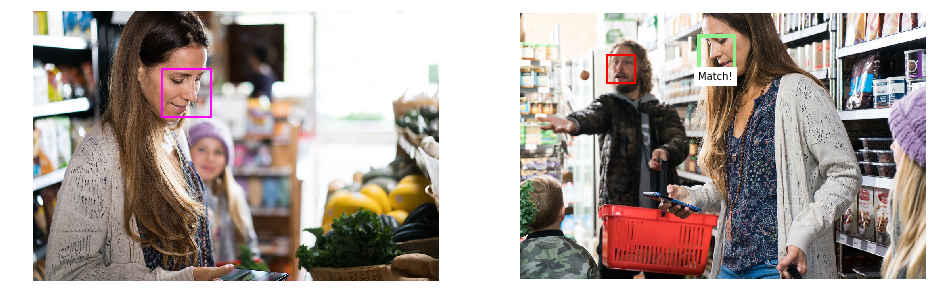

In [14]:
# 在第一张图中得到第一张脸的id
image_1_path = os.path.join('data', 'face', 'store_cam3.jpg')
image_1_stream = open(image_1_path, "rb")
image_1_faces = face_client.face.detect_with_stream(image=image_1_stream)
face_1 = image_1_faces[0]

# 在第二张图中获得所有的脸id
image_2_path = os.path.join('data', 'face', 'store_cam2.jpg')
image_2_stream = open(image_2_path, "rb")
image_2_faces = face_client.face.detect_with_stream(image=image_2_stream)
image_2_face_ids = list(map(lambda face: face.face_id, image_2_faces))

# 查找图像 2 中与图像 1 中的相似的脸
similar_faces = face_client.face.find_similar(face_id=face_1.face_id, face_ids=image_2_face_ids)

# 在图像 1 中显示脸，在图像 2 中显示相似的脸
faces.show_similar_faces(image_1_path, face_1, image_2_path, image_2_faces, similar_faces)

## 识别人脸

到目前为止，您已经看到 Face 可以检测人脸和面部特征，并可以识别两个彼此相似的面。通过增加一个 *面部识别* 解决方案，您可以更进一步，在解决方案中，您可以训练 Face 识别特定人的脸部。这在各种情况下都很有用，例如在社交媒体应用程序中自动标记好友的照片，或使用面部识别作为生物识别验证系统的一部分。

为了了解其工作原理，假设 Northwind 贸易商公司希望使用面部识别来确保只有 IT 部门的授权员工才能访问安全系统。

我们将首先创建一个 *人员组*来代表授权员工。

In [7]:
group_id = 'employee_group_id'
try:
    # 删除组（如果已存在）
    face_client.person_group.delete(group_id)
except Exception as ex:
    print(ex.message)
finally:
    face_client.person_group.create(group_id, 'employees')
    print ('Group created!')

Group created!


现在，*人组*存在，我们可以为每个员工添加一个*人*，我们希望包括在组中，然后注册每个人多张照片，以便 Face 可以了解每个人独特的面部特征。理想情况下，图像应该显示同一个人在不同的姿势和不同的面部表情。

我们将添加一位名为温德尔的员工，并注册该员工的三张照片。

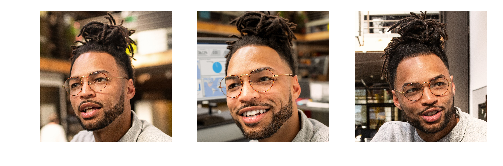

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

# # 向组添加人员 （wendell）
wendell = face_client.person_group_person.create(group_id, 'Wendell')

# 获取Wendell的照片 
folder = os.path.join('data', 'face', 'wendell')
wendell_pics = os.listdir(folder)

# 注册照片
i = 0
fig = plt.figure(figsize=(8, 8))
for pic in wendell_pics:
   # 将每张照片添加到个人组中
    img_path = os.path.join(folder, pic)
    img_stream = open(img_path, "rb")
    face_client.person_group_person.add_face_from_stream(group_id, wendell.person_id, img_stream)

    # 显示每个图像
    img = Image.open(img_path)
    i +=1
    a=fig.add_subplot(1,len(wendell_pics), i)
    a.axis('off')
    imgplot = plt.imshow(img)
plt.show()

随着人员添加和照片的注册，我们现在可以训练脸识别每个人。

In [9]:
face_client.person_group.train(group_id)
print('Trained!')

Trained!


现在，经过模型训练，您可以使用它来识别图像中识别的脸。

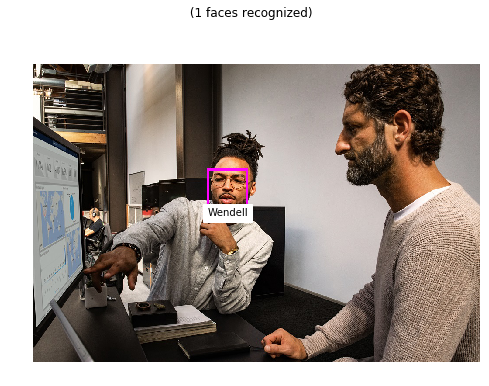

In [10]:
# 获取第二个图像中的面部 ID
image_path = os.path.join('data', 'face', 'employees.jpg')
image_stream = open(image_path, "rb")
image_faces = face_client.face.detect_with_stream(image=image_stream)
image_face_ids = list(map(lambda face: face.face_id, image_faces))

# 获取识别的面部名称
face_names = {}
recognized_faces = face_client.face.identify(image_face_ids, group_id)
for face in recognized_faces:
    person_name = face_client.person_group_person.get(group_id, face.candidates[0].person_id).name
    face_names[face.face_id] = person_name

# 显示识别的面孔
faces.show_recognized_faces(image_path, image_faces, face_names)

